
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [2]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data in dataframe
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Calculate the average age of survivors
average_age_survived = df[df['Survived'] == 1]['Age'].mean()

# Calculate the average age of non-survivors
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print("Average age of survivors:", average_age_survived)
print("Average age of non-survivors:", average_age_not_survived)

Average age of survivors: 28.343689655172415
Average age of non-survivors: 30.62617924528302



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [6]:
missing_values = df.isnull().sum()
missing_values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

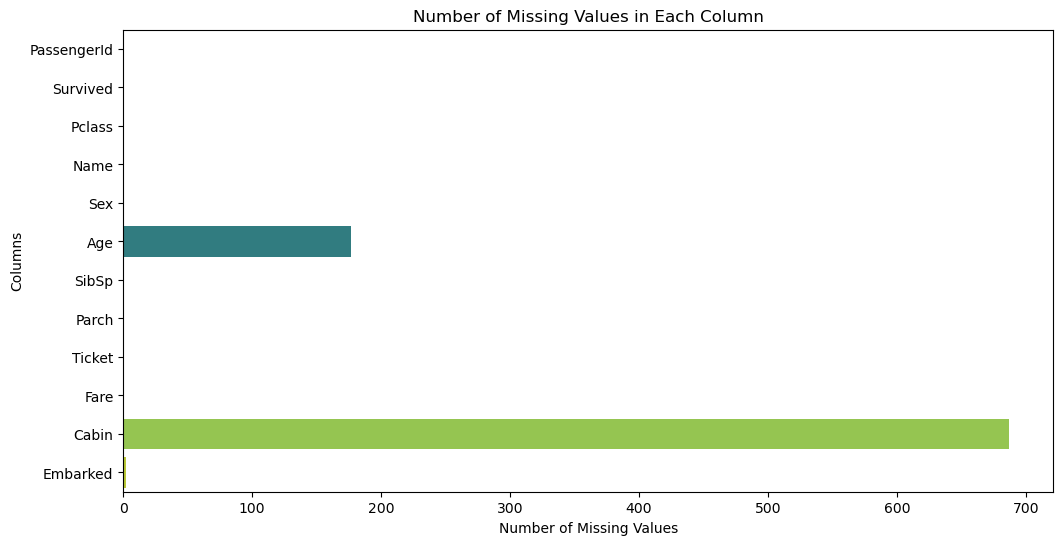

In [7]:
#Your code here
missing_values = df.isnull().sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()

In [8]:
#Your code here
# Find the column with the most NaN values
most_missing_column = missing_values.idxmax()

# Find the number of empty cells in that column
num_empty_cells = missing_values.max()

print("Column with the most NaN values:", most_missing_column)
print("Number of empty cells in that column:", num_empty_cells)

Column with the most NaN values: Cabin
Number of empty cells in that column: 687


In [9]:
#Your code here
# Delete rows where "Embarked" is empty
df = df.dropna(subset=['Embarked'])

In [10]:
#Your code here 
missing_values = df.isnull().sum()
missing_values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
#Your code here
df['Cabin'].fillna(' ¯\(ツ)/¯', inplace=True)

C:\Users\Chonn\AppData\Local\Temp\ipykernel_14380\3736724690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'].fillna(' ¯\(ツ)/¯', inplace=True)


In [12]:
#Your code here
df['Cabin']

0       ¯\(ツ)/¯
1           C85
2       ¯\(ツ)/¯
3          C123
4       ¯\(ツ)/¯
         ...   
886     ¯\(ツ)/¯
887         B42
888     ¯\(ツ)/¯
889        C148
890     ¯\(ツ)/¯
Name: Cabin, Length: 889, dtype: object

In [13]:
missing_values = df.isnull().sum()
missing_values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [14]:
#Your code here 
# Create the new "FamilyCount" column by summing "SibSp" and "Parch"
df['FamilyCount'] = df['SibSp'] + df['Parch']

C:\Users\Chonn\AppData\Local\Temp\ipykernel_14380\3260574416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilyCount'] = df['SibSp'] + df['Parch']


In [15]:
#Your code here 
# Create the new "IsReverend" column based on the title in the "Name" column
df['IsReverend'] = df['Name'].apply(lambda name: 1 if 'Rev.' in name else 0)

C:\Users\Chonn\AppData\Local\Temp\ipykernel_14380\1220786080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsReverend'] = df['Name'].apply(lambda name: 1 if 'Rev.' in name else 0)


In [16]:
#Your code here 
df_dummies = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])

In [17]:
#Your code here 
df_dummies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0,1,0,0


In [18]:
#Your code here 
df_dummies = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])

In [20]:
#Your code here 
df_dummies

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,0,0,1


In [21]:
#Your code here
#Your code here
# Define a function to extract titles from names
def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

# Apply the extract_title function to create a new "Title" column
df['Title'] = df['Name'].apply(extract_title)

# Create dummy columns for "Title"
df_dummies = pd.get_dummies(df, columns=['Title'], prefix='Title')



C:\Users\Chonn\AppData\Local\Temp\ipykernel_14380\878857493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Name'].apply(extract_title)


In [22]:
df_dummies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,1,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,1,0,0,0,0,0


In [24]:
#Your code here 
df_dummies['Title_Capt']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Title_Capt, Length: 889, dtype: uint8

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [25]:
#Your code here
# Calculate the overall survival rate
total_passengers = len(df['Name'])
survived_passengers = df['Survived'].sum()
survival_rate = round(survived_passengers / total_passengers,2)

print("Overall Survival Rate:", survival_rate)

Overall Survival Rate: 0.38


In [26]:
#Your code here
# Group the data by 'Sex' and calculate the survival rate for each gender
gender_survival = df.groupby('Sex')['Survived'].mean()

# Find the gender with the lowest survival rate
worst_gender = gender_survival.idxmin()
worst_survival_rate = gender_survival.min()

print(f"The gender that fared the worst was '{worst_gender}' with a survival rate of {worst_survival_rate:.2%}.")

The gender that fared the worst was 'male' with a survival rate of 18.89%.


In [27]:
#Your code here 
# Group the data by 'Pclass' and calculate the survival rate for each class
pclass_survival = round(df.groupby('Pclass')['Survived'].mean(),2)

# Print the survival rate for each class
print("Survival Rate by Pclass:")
print(pclass_survival)

Survival Rate by Pclass:
Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64


In [28]:
#Your code here 
# Count the number of reverends who survived
reverends = df[df['IsReverend'] == 1]

survived_reverends = reverends['Survived'].sum()

print("Number of Reverends who survived:", survived_reverends)

Number of Reverends who survived: 0


In [29]:
#Your code here 
# Filter the dataset for passengers with cabins marked ¯\(ツ)/¯
unknown_cabin_passengers = df[df['Cabin'] == '¯\(ツ)/¯']

# Calculate the survival rate for passengers with unknown cabins
survival_rate_unknown_cabin = round(unknown_cabin_passengers['Survived'].mean(),2)

print("Survival Rate for Passengers with Unknown Cabins:", survival_rate_unknown_cabin)

Survival Rate for Passengers with Unknown Cabins: nan


In [30]:
#Your code here 
# Filter the dataset for passengers with missing Age values
missing_age_passengers = df[df['Age'].isnull()]

# Calculate the survival rate for passengers with missing Age values
survival_rate_missing_age = round(missing_age_passengers['Survived'].mean(),2)

print("Survival Rate for Passengers with Missing Age:", survival_rate_missing_age)

Survival Rate for Passengers with Missing Age: 0.29


In [31]:
#Your code here 
# Group the data by 'Embarked' and calculate the survival rate for each port
port_survival = round(df.groupby('Embarked')['Survived'].mean(),2)

print("Survival Rate by Port of Embarkation:")
print(port_survival)

Survival Rate by Port of Embarkation:
Embarked
C    0.55
Q    0.39
S    0.34
Name: Survived, dtype: float64


In [32]:
#Your code here 
# Filter the dataset for passengers under 12 years old
children = df[df['Age'] < 12]

# Calculate the survival rate for children in each Pclass
survival_rate_children_by_pclass = round(children.groupby('Pclass')['Survived'].mean(),2)

print("Survival Rate for Children (Under 12) by Pclass:")
print(survival_rate_children_by_pclass)

Survival Rate for Children (Under 12) by Pclass:
Pclass
1    0.75
2    1.00
3    0.40
Name: Survived, dtype: float64


In [33]:
#Your code here 
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [34]:
#Your code here 
Capt = df[df['Title'] == 'Capt']
Capt

survival_capt  = Capt['Survived'].sum()
survival_capt  

print("Survival number of Capt is:", survival_capt)

Survival number of Capt is: 0


In [35]:
#Your code here 
# Filter the dataset for passengers who did not survive
non_survivors = df[df['Survived'] == 0]

# Find the passenger with the highest fare among non-survivors
#most_expensive_ticket = non_survivors[non_survivors['Fare'] == non_survivors['Fare'].max()]
most_expensive_ticket  = non_survivors['Fare'].max()
whose_most_expensive_ticket  = non_survivors[non_survivors['Fare']==most_expensive_ticket]
#whose_most_expensive_ticket  = non_survivors['Name'].max()
#most_expensive_ticket

print("The passenger with the most expensive ticket among those who died was:")
print(whose_most_expensive_ticket['Name'])
print("and it cost: ", most_expensive_ticket)
# Extract the name and fare of the passenger with the most expensive ticket
#passenger_name = most_expensive_ticket.iloc[0]['Name']
#fare_amount = most_expensive_ticket.iloc[0]['Fare']

#print(f"The passenger with the most expensive ticket among those who died was {passenger_name}, and it cost {fare_amount:.2f} dollars.")

The passenger with the most expensive ticket among those who died was:
27     Fortune, Mr. Charles Alexander
438                 Fortune, Mr. Mark
Name: Name, dtype: object
and it cost:  263.0


In [37]:
#Your code here 
#Your code here
# Create a new column "IsAlone" that indicates whether a passenger was traveling alone (0) or with family (1 or more)
df['IsAlone'] = df['FamilyCount'].apply(lambda size: 0 if size > 0 else 1)

# Calculate the survival rate for passengers traveling alone
survival_rate_alone = df[df['IsAlone'] == 1]['Survived'].mean()

# Calculate the survival rate for passengers traveling with family
survival_rate_with_family = df[df['IsAlone'] == 0]['Survived'].mean()

print("Survival Rate for Passengers Traveling Alone:", survival_rate_alone)
print("Survival Rate for Passengers Traveling with Family:", survival_rate_with_family)

Survival Rate for Passengers Traveling Alone: 0.30093457943925234
Survival Rate for Passengers Traveling with Family: 0.5056497175141242


C:\Users\Chonn\AppData\Local\Temp\ipykernel_14380\1024157288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'] = df['FamilyCount'].apply(lambda size: 0 if size > 0 else 1)


In [ ]:
#Your code here 

In [ ]:
#Your code here 

In [ ]:
#Your code here 

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


C:\Users\Chonn\AppData\Local\Temp\ipykernel_14380\4028229548.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])


Text(0.5, 1.0, 'Survival by Embarked Port')

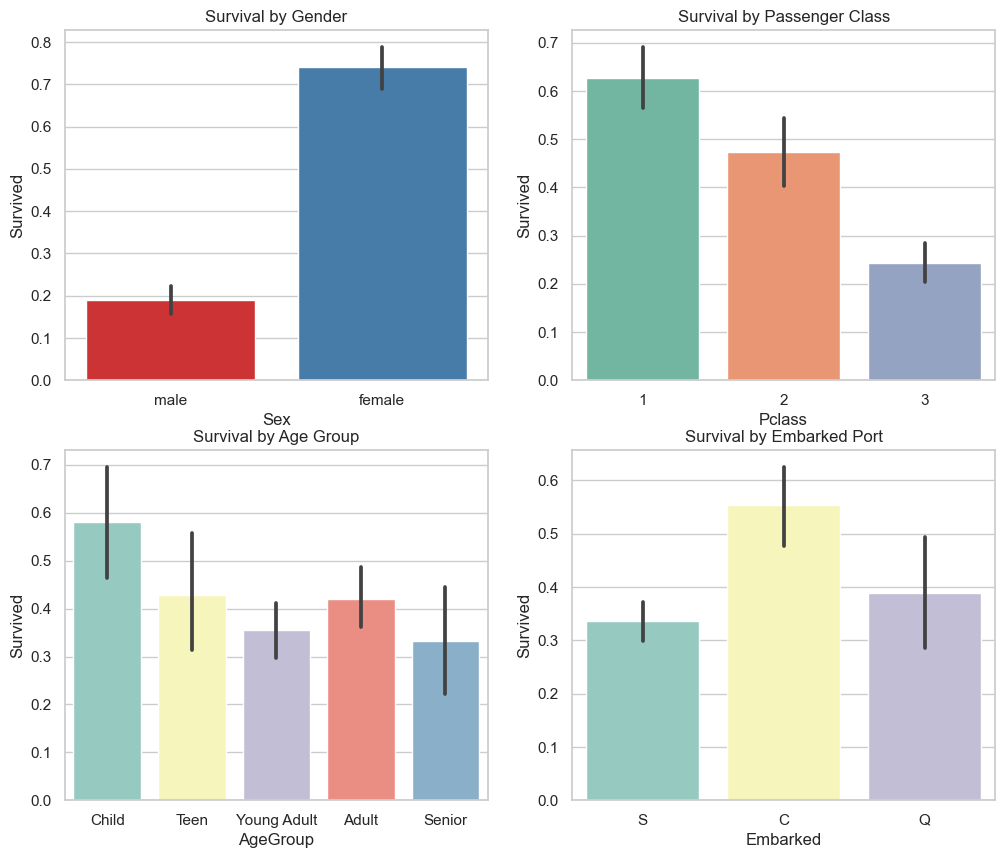

In [38]:
#Your code here 
#Your code here
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Visualization 1: Survival by Gender
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 0], palette="Set1")
axes[0, 0].set_title("Survival by Gender")

# Visualization 2: Survival by Passenger Class (Pclass)
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Survival by Passenger Class")

# Visualization 3: Survival by Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=df, ax=axes[1, 0], palette="Set3")
axes[1, 0].set_title("Survival by Age Group")

# Visualization 4: Survival by Embarked Port
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[1, 1], palette="Set3")
axes[1, 1].set_title("Survival by Embarked Port")

# Adjust subplot layout
#plt.tight_layout()

# Show the visualizations
#plt.show()

In [ ]:
#Your code here 

In [ ]:
#Your code here 

In [ ]:
#Your code here 